1. Import all required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2. Read the csv file and if you experience ‘unicodedecodeerror’ then set the second parameter in read_csv method to ‘encoding=iso-8859-1’

In [2]:
fires = pd.read_csv("amazon.csv")

3. Check data type of each column

a. Find what the type of the ‘date’ column is

In [3]:
fires.date.dtype

dtype('O')

b. If it is of ‘object’ type, we need to convert the type into datetime

c. For conversion you need to make changes again in the read_csv
method, put third parameter into it for parsing dates 

In [4]:
fires = pd.read_csv("amazon.csv", parse_dates = ["date"])

d. Please check after making changes what is the data type of date
column is (it should be datetime)

In [5]:
fires.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [6]:
# Cast number to an int, since partial fires don't make much sense.
fires["number"] = fires["number"].astype("int64")
fires.dtypes

year               int64
state             object
month             object
number             int64
date      datetime64[ns]
dtype: object

4. Display top 5 rows of the dataset.

In [7]:
fires.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0,1998-01-01
1,1999,Acre,Janeiro,0,1999-01-01
2,2000,Acre,Janeiro,0,2000-01-01
3,2001,Acre,Janeiro,0,2001-01-01
4,2002,Acre,Janeiro,0,2002-01-01


5. Check the last 5 rows.

In [8]:
fires.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128,2012-01-01
6450,2013,Tocantins,Dezembro,85,2013-01-01
6451,2014,Tocantins,Dezembro,223,2014-01-01
6452,2015,Tocantins,Dezembro,373,2015-01-01
6453,2016,Tocantins,Dezembro,119,2016-01-01


6. Find the shape of our dataset (number of rows and number of columns).

a. Print the number of rows and columns separately

In [9]:
print(f"There are {fires.shape[0]} rows.")
print(f"There are {fires.shape[1]} columns.")

There are 6454 rows.
There are 5 columns.


7. Getting information about our dataset like total number rows, total number of columns, datatypes of each column and memory requirement.

In [10]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   int64         
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 252.2+ KB


8. Check for duplicate data and drop them.

a. You can use duplicated () method

In [11]:
duplicates = fires.duplicated()
duplicates.value_counts()

False    6421
True       33
dtype: int64

b. Please mention how many duplicate values are removed

In [12]:
fires = fires[~duplicates]
len(fires)

6421

9. Check null values in the dataset.

a. Please add a comment if you find any null value

In [13]:
fires.isnull().any()

year      False
state     False
month     False
number    False
date      False
dtype: bool

10. Get overall statistics about the data frame.

a. Here you will find that you are getting only numeric columns

In [14]:
fires.describe()

,year,number
count,6421.000000,6421.000000
mean,2007.490734,108.773867
std,5.732222,191.184606
min,1998.000000,0.000000
25%,2003.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,114.000000
max,2017.000000,998.000000


b. Show categorical columns as well, if you get a warning,
 add extra parameters in the method.

In [15]:
fires.state.value_counts()

Rio                 696
Mato Grosso         473
Paraiba             472
Acre                239
Par�                239
Sergipe             239
Sao Paulo           239
Santa Catarina      239
Roraima             239
Rondonia            239
Piau                239
Pernambuco          239
Minas Gerais        239
Alagoas             239
Maranhao            239
Goias               239
Espirito Santo      239
Distrito Federal    239
Ceara               239
Bahia               239
Amazonas            239
Amapa               239
Tocantins           239
Name: state, dtype: int64

In [16]:
fires.month.value_counts()

Setembro     540
Outubro      540
Novembro     540
Junho        539
Julho        539
Agosto       539
Janeiro      535
Fevereiro    535
Mar�o        534
Abril        534
Maio         533
Dezembro     513
Name: month, dtype: int64

11. Rename month names to English.

In [17]:
fires["month"] = fires["month"].replace({"Janeiro": "January", "Fevereiro": "February", "Mar�o": "March", "Abril": "April", "Maio": "May", "Junho": "June", 
                      "Julho": "July", "Agosto": "August", "Setembro": "September", "Outubro": "October", "Novembro": "November", "Dezembro": "December"})
fires.month.value_counts()

September    540
October      540
November     540
June         539
July         539
August       539
January      535
February     535
March        534
April        534
May          533
December     513
Name: month, dtype: int64

12. Total number of fires registered.

In [18]:
fires["number"].sum()

698437

13. In which month was the maximum number of forest fires reported?

a. You need to create proper stats and showing them with the help of
bar plot

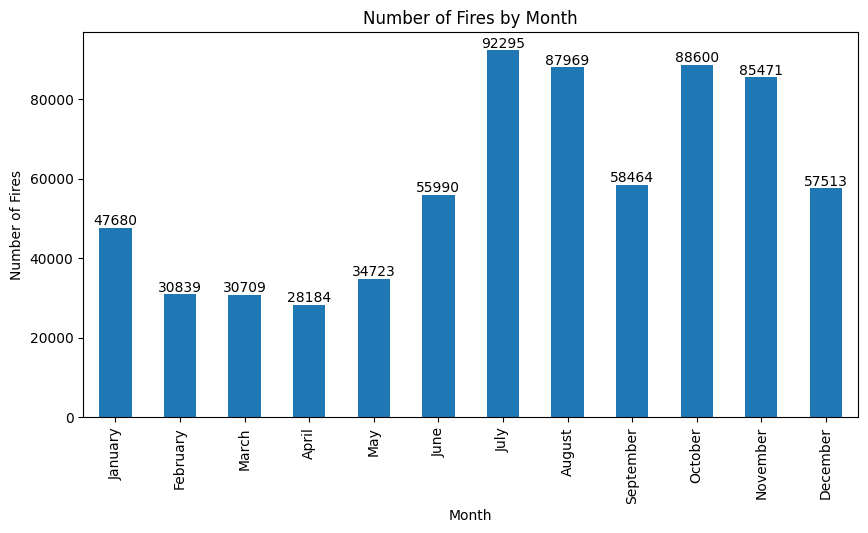

In [19]:
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
fires["month"] = pd.Categorical(fires["month"], categories = month_order, ordered = True)

fires_monthly = fires.sort_values("month")
fires_monthly = fires_monthly.groupby("month")["number"].sum()

month_fire_plot = fires_monthly.plot(kind = "bar", figsize = (10, 5))
plt.xlabel("Month")
plt.ylabel("Number of Fires")
plt.title("Number of Fires by Month")
for bar in month_fire_plot.containers:
    month_fire_plot.bar_label(bar)
plt.show()

b. Mention in your comment what did you observe

In [20]:
# July has the most reported fires at 92,295.
# Fires seem to happen the most in the second half of the year. Specifically July-August and October-November see drastically more fires.
# There are relatively little fires from February to May.

14. In which year was the maximum number of forest fires reported?

a. Please visualize your output with barplot

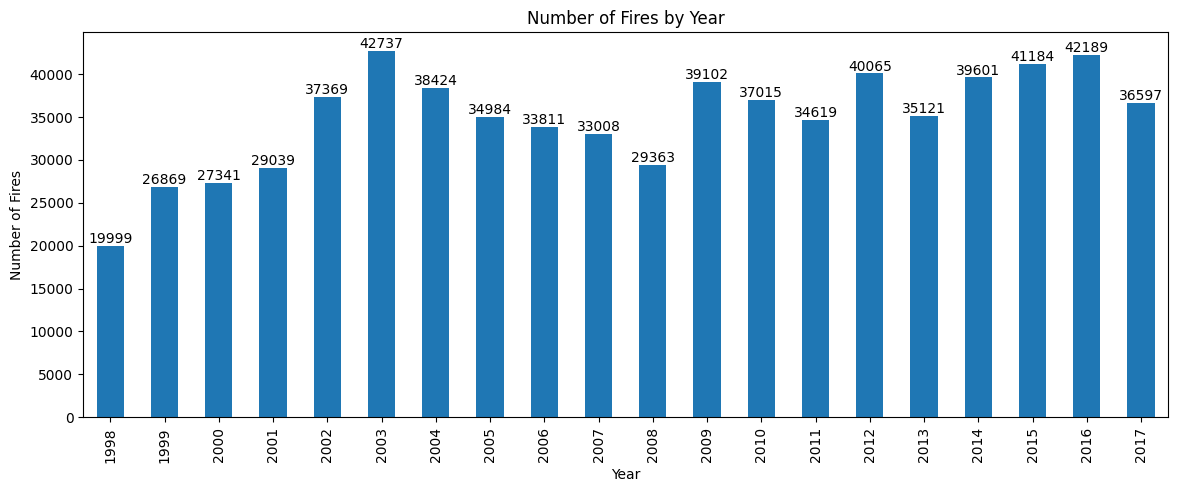

In [21]:
fires_yearly = fires.sort_values("year")
fires_yearly = fires_yearly.groupby("year")["number"].sum()

year_fire_plot = fires_yearly.plot(kind = "bar", figsize = (14, 5))
plt.xlabel("Year")
plt.ylabel("Number of Fires")
plt.title("Number of Fires by Year")
for bar in year_fire_plot.containers:
    year_fire_plot.bar_label(bar)
plt.show()

In [22]:
# The year with the most fires was 2003 with 42,737.

15. Which state has the maximum number of forest fires reported?

a. Visualization should be there

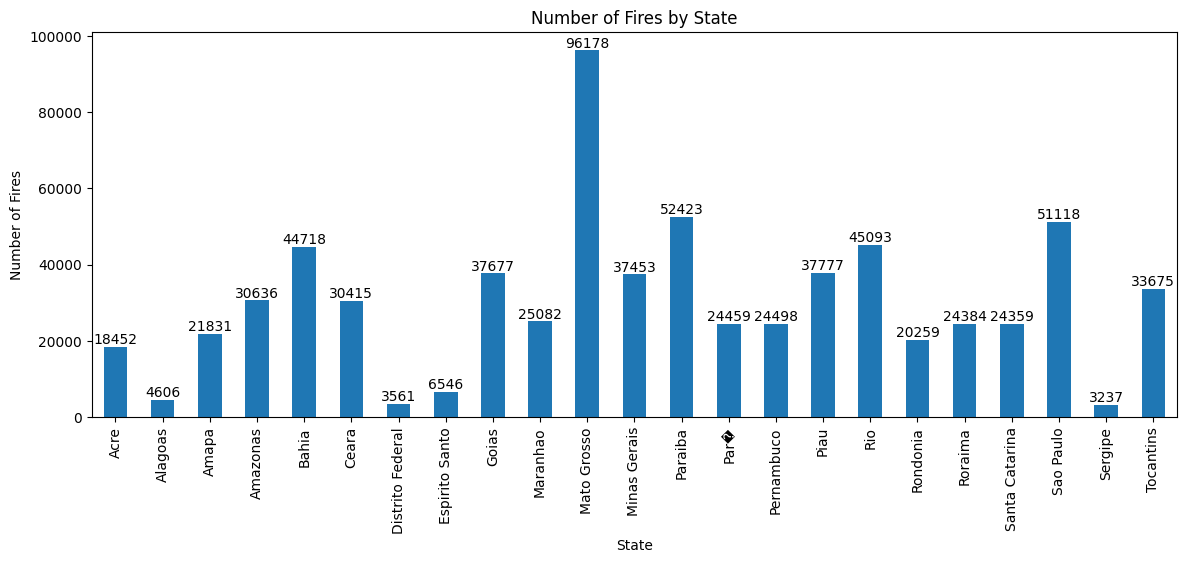

In [23]:
fires_stately = fires.sort_values("state")
fires_stately = fires_stately.groupby("state")["number"].sum()

state_fire_plot = fires_stately.plot(kind = "bar", figsize = (14, 5))
plt.xlabel("State")
plt.ylabel("Number of Fires")
plt.title("Number of Fires by State")
for bar in state_fire_plot.containers:
    state_fire_plot.bar_label(bar)
plt.show()

16. Find total number of fires were reported in amazonas (state of brazil)

a. Add in comment the number of reports

In [24]:
fires_stately["Amazonas"]

30636

17. Display number of fires were reported in amazon (year-wise)

a. Visualize it using barplot after using groupby

18. Display number of fires were reported in amazon (day-wise)

a. You need to visualize the result using weekdays name

b. Don’t forget to mention your observation in comment

19. Find the total number of fires reported in 2015 and visualize data
based on each ‘month’.

a. Showing output with beautiful barplot

b. Mention your observation in comment

20. Find the average number of fires reported from highest to lowest
(state-wise).

a. Visualization should be there with proper observation

21. To find the state names where fires were reported in 'dec' month.